In [ ]:
import zipfile
import os

In [ ]:
# Define the path to the ZIP file and extraction directory
zip_path = "/content/drive/MyDrive/KDD-19 dataset.zip"  # Update this if the path is different
extract_dir = "/content/KDD-19 dataset"

In [ ]:
# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
legit_df = pd.read_csv("/content/KDD-19 dataset/MTA-KDD-19-master/datasetLegitimate33featues.csv")
malware_df = pd.read_csv("/content/KDD-19 dataset/MTA-KDD-19-master/datasetMalware33featues.csv")

In [ ]:
legit_df['Label'] = 0  # 0 for legitimate traffic
malware_df['Label'] = 1  # 1 for malware traffic

In [ ]:
df = pd.concat([legit_df, malware_df], ignore_index=True)

In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64554 entries, 0 to 64553
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FinFlagDist          64554 non-null  float64
 1   SynFlagDist          64554 non-null  float64
 2   RstFlagDist          64554 non-null  float64
 3   PshFlagDist          64554 non-null  float64
 4   AckFlagDist          64554 non-null  float64
 5   DNSoverIP            64554 non-null  float64
 6   TCPoverIP            64554 non-null  float64
 7   UDPoverIP            64554 non-null  float64
 8   MaxLen               64554 non-null  float64
 9   MinLen               64554 non-null  float64
 10  StdDevLen            64554 non-null  float64
 11  AvgLen               64554 non-null  float64
 12  MaxIAT               64554 non-null  float64
 13  MinIAT               64554 non-null  float64
 14  AvgIAT               64554 non-null  float64
 15  AvgWinFlow           64554 non-null 

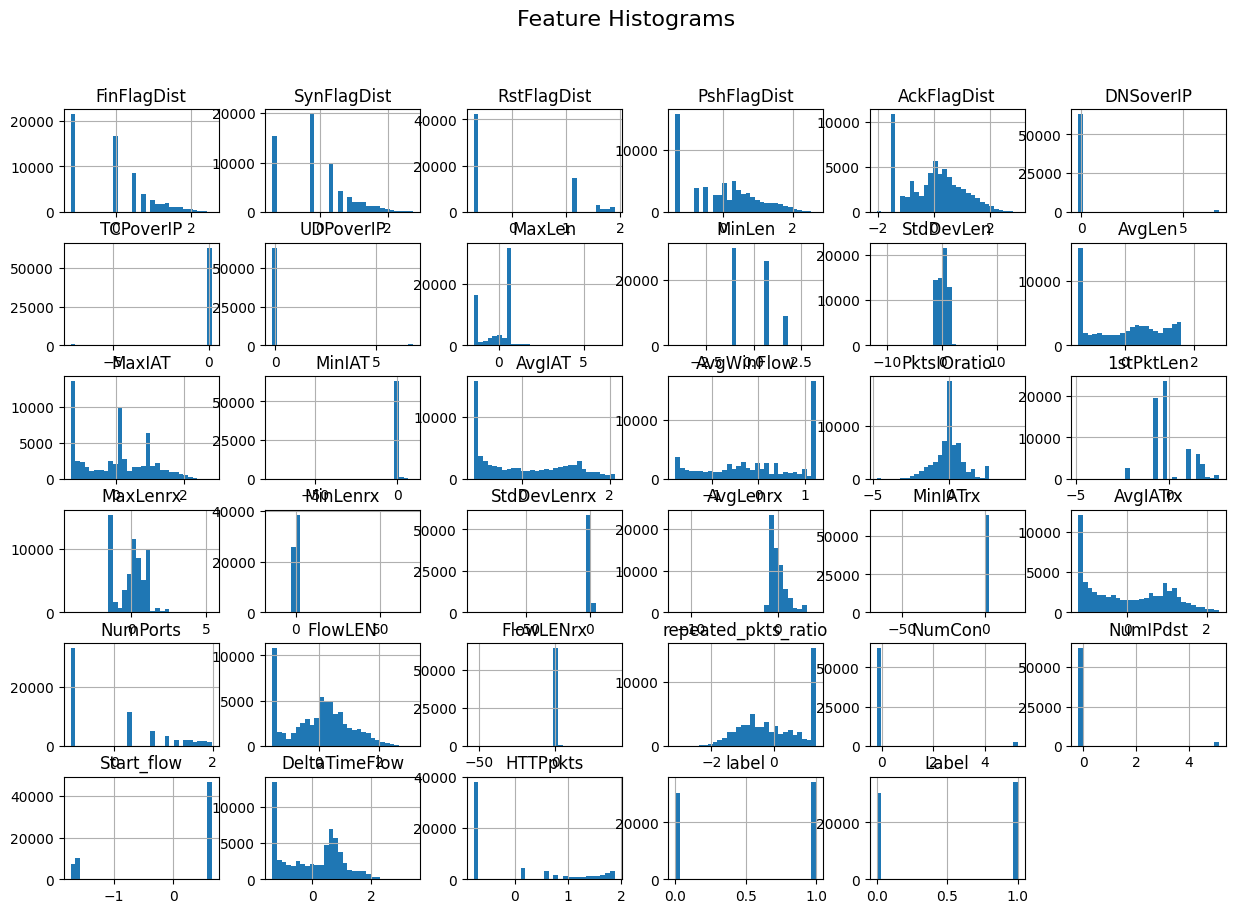

In [ ]:
#  Histograms
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Histograms", fontsize=16)
plt.show()

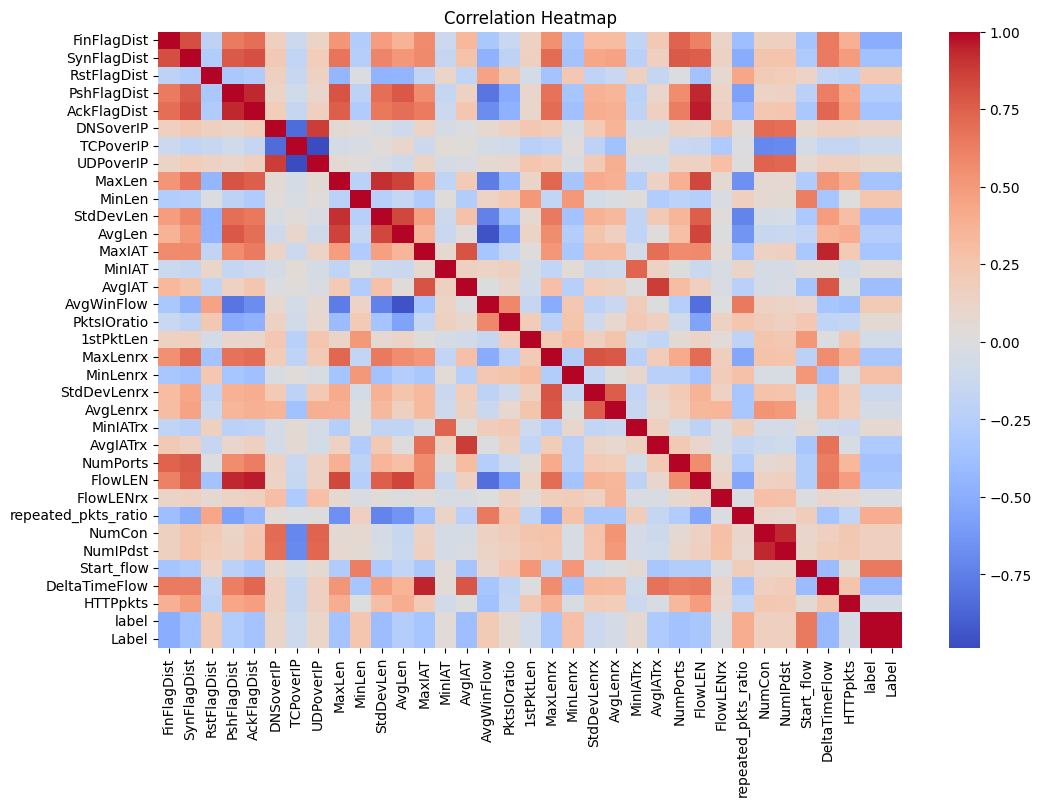

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

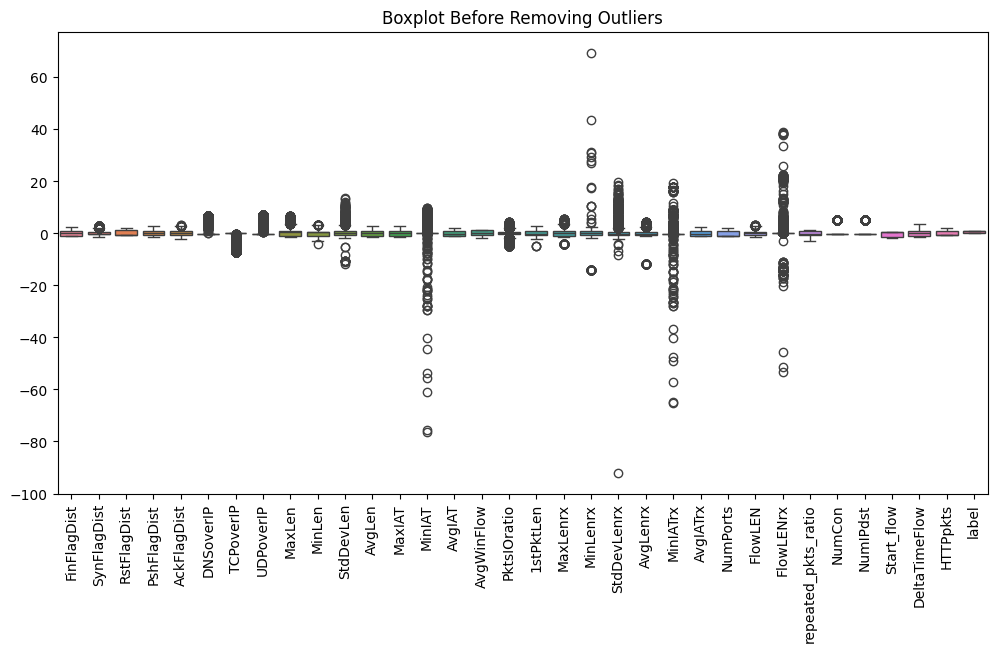

In [ ]:
# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [ ]:

# Define a function to remove outliers using Z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
    return data[(z_scores < threshold).all(axis=1)]

df_cleaned = remove_outliers_zscore(df)

print(f"Original dataset size: {df.shape}")
print(f"Dataset size after outlier removal: {df_cleaned.shape}")


Original dataset size: (64554, 35)
Dataset size after outlier removal: (60058, 35)


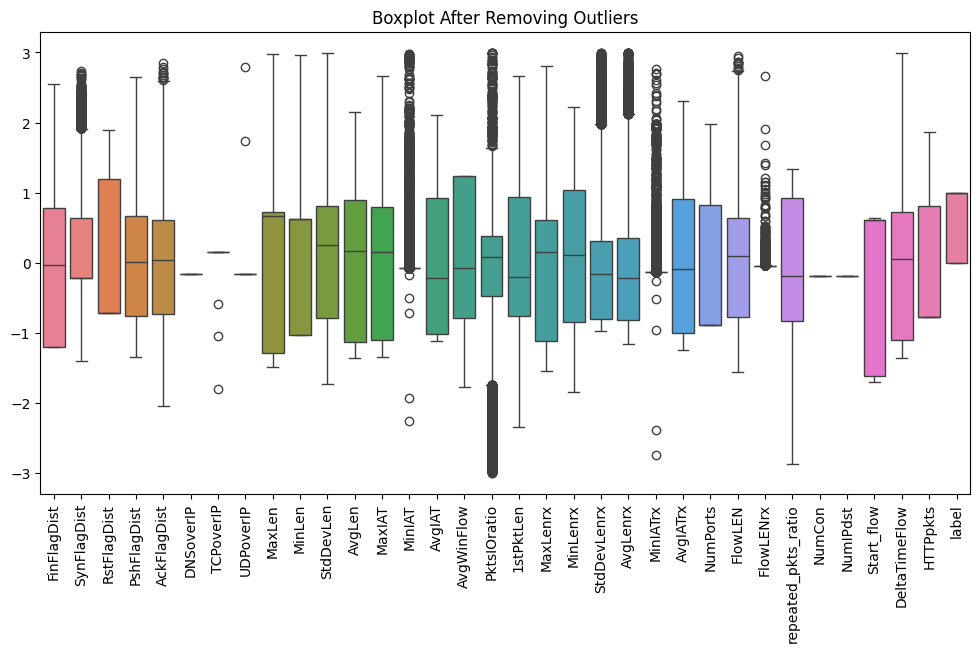

In [ ]:

#Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot After Removing Outliers")
plt.show()


Original dataset size: (64554, 35)
Dataset size after IQR-based outlier removal: (36594, 35)


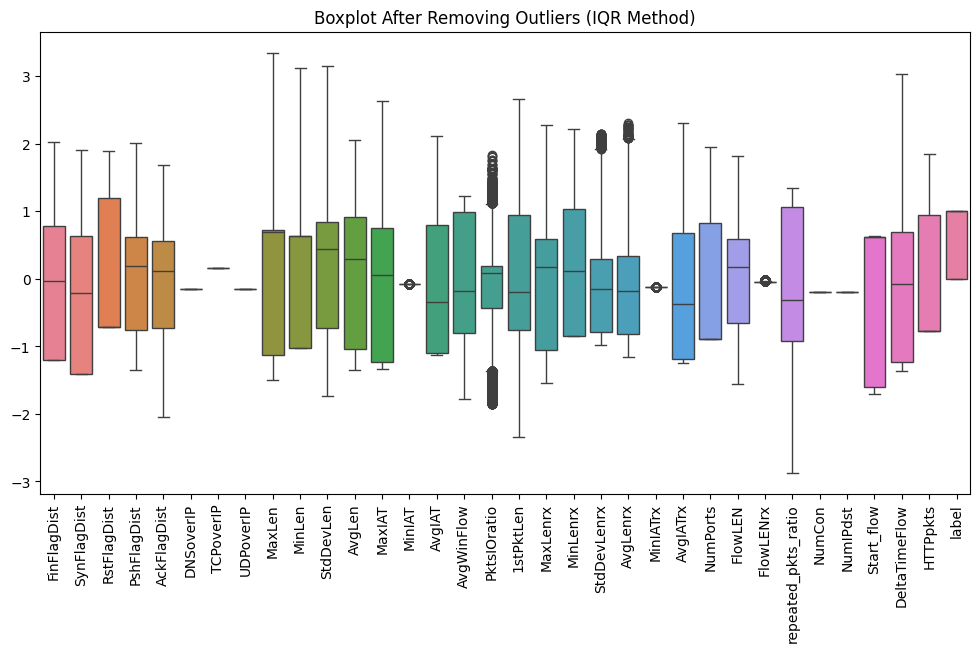

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Apply IQR method
df_cleaned_iqr = remove_outliers_iqr(df)

print(f"Original dataset size: {df.shape}")
print(f"Dataset size after IQR-based outlier removal: {df_cleaned_iqr.shape}")

# Plot Boxplot after removing outliers using IQR
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned_iqr.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot After Removing Outliers (IQR Method)")
plt.show()


In [ ]:
# Skewness & Kurtosis
skewness = df_cleaned.skew()
kurt = df_cleaned.kurtosis()

print("\nSkewness of features:\n", skewness)
print("\nKurtosis of features:\n", kurt)


Skewness of features:
 FinFlagDist              0.138945
SynFlagDist              0.045319
RstFlagDist              0.814967
PshFlagDist              0.093467
AckFlagDist              0.025608
DNSoverIP                0.000000
TCPoverIP             -167.846779
UDPoverIP              184.681898
MaxLen                  -0.530928
MinLen                   0.214378
StdDevLen               -0.462292
AvgLen                  -0.017915
MaxIAT                   0.161172
MinIAT                   9.066968
AvgIAT                   0.349771
AvgWinFlow              -0.145987
PktsIOratio              0.028921
1stPktLen                0.393912
MaxLenrx                -0.213717
MinLenrx                 0.146703
StdDevLenrx              1.014763
AvgLenrx                 0.880397
MinIATrx                 4.236856
AvgIATrx                 0.205420
NumPorts                 0.568034
FlowLEN                  0.009644
FlowLENrx               24.517812
repeated_pkts_ratio      0.065445
NumCon                  

In [ ]:
# Remove Highly Correlated Features
import numpy as np

# Find highly correlated features
corr_matrix = df_cleaned.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Highly Correlated Features:", high_corr_features)

# Drop those features
df_cleaned = df_cleaned.drop(columns=high_corr_features)

Highly Correlated Features: ['AckFlagDist', 'UDPoverIP', 'StdDevLen', 'AvgWinFlow', 'AvgLenrx', 'FlowLEN', 'DeltaTimeFlow', 'Label']


In [ ]:
# Reduce Model Complexity
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    max_features="sqrt",
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [ ]:
# Apply Cross-Validation:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
scores = cross_val_score(rf, X, y, cv=5)

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))  # More realistic accuracy

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
import numpy as np

# Find highly correlated features
corr_matrix = df_cleaned.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9, excluding the 'Label' column
high_corr_features = [column for column in upper_tri.columns
                      if any(upper_tri[column] > 0.9) and column != 'Label']
print("Highly Correlated Features:", high_corr_features)

# Drop those features
df_cleaned = df_cleaned.drop(columns=high_corr_features)

Highly Correlated Features: []


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 1.0


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 1.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE


In [ ]:
# Handle Missing Values
df.fillna(df.median(), inplace=True)

In [ ]:
#  Remove Highly Correlated Features
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df = df.drop(columns=high_corr_features)


In [ ]:
#  Remove Outliers Using IQR Method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

df = remove_outliers_iqr(df)


In [ ]:
# Separate Features & Target Variable
# Check if 'Label' exists in the columns, otherwise use a different method
if 'Label' in df.columns:
    X = df.drop(columns=["Label"])  # If 'Label' column exists
    y = df["Label"]
else:
    # If 'Label' is not found, try accessing it using iloc
    # Assuming 'Label' is the last column
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

In [ ]:
# Feature Selection (Select Top 20 Best Features)
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)


In [ ]:
# Balance Dataset Using SMOTE (Only If Needed)
if y.value_counts().min() / y.value_counts().max() < 0.5:  # Check class imbalance
    smote = SMOTE()
    X_new, y = smote.fit_resample(X_new, y)


In [ ]:
# Split Data (Train 70% - Test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42, shuffle=True)


In [ ]:
# Standardize Data (For Better Model Performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Final Output
print(f"Final dataset shape after preprocessing: {X_train.shape}")


Final dataset shape after preprocessing: (25713, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report




In [ ]:
# Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#  Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Model Accuracy: 0.9997

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5465
         1.0       1.00      1.00      1.00      5555

    accuracy                           1.00     11020
   macro avg       1.00      1.00      1.00     11020
weighted avg       1.00      1.00      1.00     11020



In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# Train the Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred_logreg = logreg.predict(X_test)


In [ ]:
# Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9544

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      5465
         1.0       0.95      0.96      0.96      5555

    accuracy                           0.95     11020
   macro avg       0.95      0.95      0.95     11020
weighted avg       0.95      0.95      0.95     11020



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)

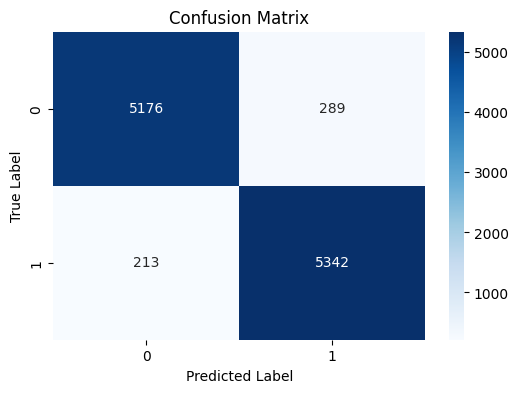

In [ ]:
# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate SVM Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9957

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5465
         1.0       1.00      1.00      1.00      5555

    accuracy                           1.00     11020
   macro avg       1.00      1.00      1.00     11020
weighted avg       1.00      1.00      1.00     11020



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Compute Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

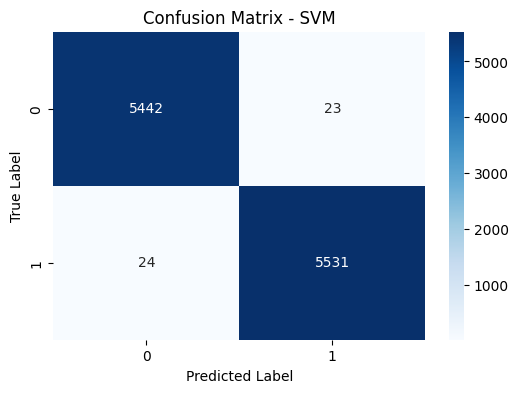

In [ ]:
# Plot Confusion Matrix for SVM
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Train KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Use 5 nearest neighbors
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predictions
y_pred_knn = knn_model.predict(X_test)


In [ ]:
# Evaluate KNN Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9926

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5465
         1.0       0.99      0.99      0.99      5555

    accuracy                           0.99     11020
   macro avg       0.99      0.99      0.99     11020
weighted avg       0.99      0.99      0.99     11020



In [ ]:
# Compute Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)


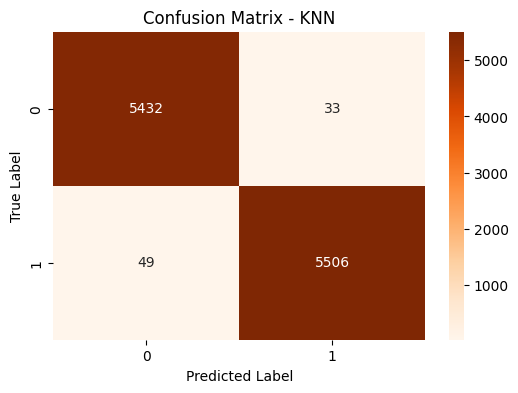

In [ ]:
# Plot Confusion Matrix for KNN
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

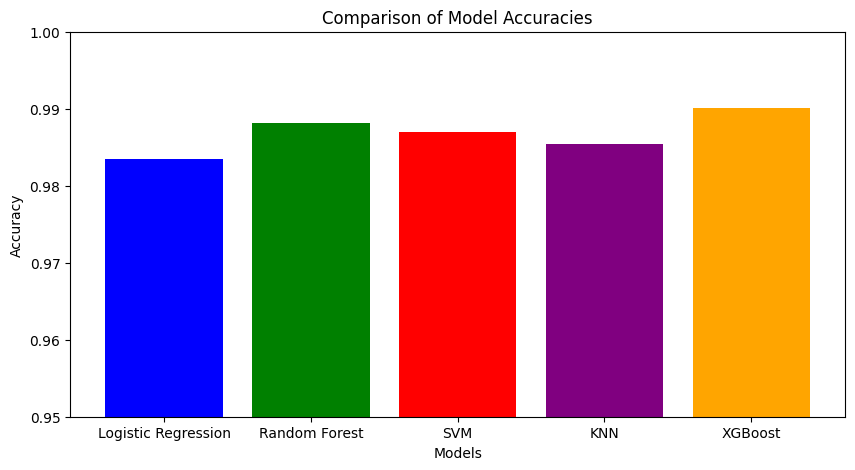

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ["Logistic Regression", "Random Forest", "SVM", "KNN", "XGBoost"]
accuracy = [0.9835, 0.9882, 0.9870, 0.9854, 0.9901]  # Replace with actual accuracy values from your outputs

# Bar plot for Accuracy Comparison
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)
plt.title("Comparison of Model Accuracies")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or whatever model you're using
import zipfile  # Import zipfile for extracting files

# Extract the CSV files from the ZIP archive
with zipfile.ZipFile('/content/drive/MyDrive/KDD-19 dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/KDD-19 dataset')  # Extract to a directory

# Load the legitimate dataset
legit_df = pd.read_csv('/content/KDD-19 dataset/MTA-KDD-19-master/datasetLegitimate33featues.csv')
# Load the malware dataset
malware_df = pd.read_csv('/content/KDD-19 dataset/MTA-KDD-19-master/datasetMalware33featues.csv')

# Add labels to the datasets
legit_df['Label'] = 0  # 0 for legitimate traffic
malware_df['Label'] = 1  # 1 for malware traffic

# Combine the datasets
df = pd.concat([legit_df, malware_df], ignore_index=True)

# Prepare features and target
X = df.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = df['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Train the model
model = RandomForestClassifier()  # Replace with your actual model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute accuracies
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Define the z-test
def z_test(p1, p2, n1, n2):
    p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
    standard_error = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z_score = (p1 - p2) / standard_error
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    return z_score, p_value

# Get sample sizes
train_samples = len(X_train)
test_samples = len(X_test)

# Perform the z-test
z_score, p_value = z_test(train_accuracy, test_accuracy, train_samples, test_samples)
print(f"Z-score: {z_score:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference between train and test accuracy (p < 0.05). Model may be overfitting.")
else:
    print("No significant difference between train and test accuracy.")

Z-score: nan, P-value: nan
No significant difference between train and test accuracy.


<ipython-input-82-d7cd88431924>:47: RuntimeWarning: invalid value encountered in scalar divide
  z_score = (p1 - p2) / standard_error


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Replace these with your actual training and validation accuracies
# For example, if you have a list of accuracies for each epoch:
train_accuracy = [0.95, 0.96, 0.97, 0.98, 0.99]
val_accuracy = [0.92, 0.93, 0.94, 0.95, 0.96]

# Perform t-test
t_stat, t_p_value = ttest_ind(train_accuracy, val_accuracy)

print(f"T-test Statistic: {t_stat:.4f}, P-value: {t_p_value:.4f}")

T-test Statistic: 3.0000, P-value: 0.0171


In [ ]:
from scipy.stats import f_oneway

# Replace with your actual training and validation accuracy lists
train_accuracy = [0.95, 0.96, 0.97, 0.98, 0.99]  # Example values
val_accuracy = [0.92, 0.93, 0.94, 0.95, 0.96]  # Example values

anova_stat, anova_p_value = f_oneway(train_accuracy, val_accuracy)
print(f"ANOVA F-statistic: {anova_stat:.4f}, P-value: {anova_p_value:.4f}")

if anova_p_value < 0.05:
    print("Significant differences exist between training and validation accuracy over epochs.")
else:
    print("No significant differences between training and validation accuracy.")

ANOVA F-statistic: 9.0000, P-value: 0.0171
Significant differences exist between training and validation accuracy over epochs.
